### Loading the Data

In [9]:
import torch
from torch.utils.data import DataLoader
from .datasets import HDF5SpectrogramDataset
from .nf_training_script import train_model  
from .audio_image_pipeline import preprocess_to_hdf5
from .inference import load_nf_model, sample_from_flow
import matplotlib.pyplot as plt

ImportError: attempted relative import with no known parent package

### Loading Data

In [6]:
# asbolute path because i got in trouble
audio_folder = "/Users/koraygecimli/PycharmProjects/UDL_demo/wewantCNNs_project/data/nsynth-valid/audio"

# this is the path where we save our converted data
output_h5_path = "/Users/koraygecimli/PycharmProjects/UDL_demo/wewantCNNs_project/data/train_spectrograms_even.h5"

preprocess_to_hdf5(audio_folder, output_h5_path) # turns audio data into hdf5 data 

  2%|▏         | 197/12678 [00:00<01:02, 199.26it/s]


KeyboardInterrupt: 

### Training

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

train_data = HDF5SpectrogramDataset('/Users/koraygecimli/PycharmProjects/UDL_demo/wewantCNNs_project/data/train_spectrograms_even.h5')

train_loader = DataLoader( # again inspired by vae model 
    train_data,
    batch_size=32,  
    shuffle=True,
    pin_memory=True,
    num_workers=0,
    persistent_workers=False,
    prefetch_factor=None,
)

input_dim = train_data[0].numel()
trained_model = train_model(train_loader, input_dim=input_dim)

Using device: cpu


KeyboardInterrupt: 

### Generating new samples

Sample shape (flattened): torch.Size([1, 22016])


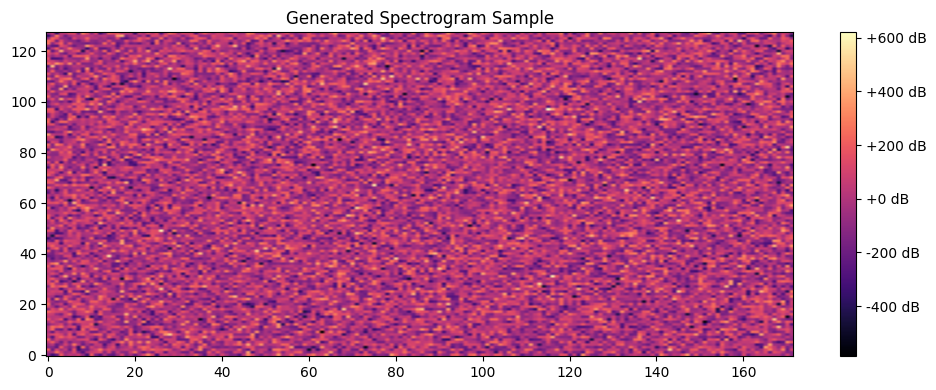

In [8]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
model, input_dim = load_nf_model(device)
sample = sample_from_flow(model, input_dim, device, batch_size=1)
print("Sample shape (flattened):", sample.shape)
spec = sample.view(128, 172).cpu().numpy()


plt.figure(figsize=(10, 4))
plt.imshow(spec, aspect='auto', cmap='magma', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title("Generated Spectrogram Sample")
plt.tight_layout()
plt.show()

this takes a of time since we need to recompute everything since we do net have coupling flows
